In [1]:
import time
import json
import requests
import numpy as np
import pandas as pd

import requests
from requests.auth import HTTPBasicAuth

from github.api import Config

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
conf = Config()

In [3]:
user_df = pd.read_csv(conf.getUserPath())
repos_df = pd.read_csv(conf.getRepoPath())
commits_df = pd.read_csv(conf.getCommitPath())
lang_df = pd.read_csv(conf.getLanguagePath())

## Analisys

In [4]:
repos = repos_df
commits = commits_df

In [5]:
print("Total repos till date: {}".format(repos.shape[0]))
print("Total commits till date: {}".format(commits.shape[0]))
print("Total starts till date: {}".format(repos['Stars count'].sum()))
print("Total Watchers till date: {}".format(repos['Watchers count'].sum()))

Total repos till date: 26
Total commits till date: 463
Total starts till date: 0
Total Watchers till date: 0


In [6]:
commits_count = pd.DataFrame(pd.merge(repos, 
         commits, 
         left_on='Id', 
         right_on='Repo Id', 
         how = 'left').groupby('Id').size().reset_index())


In [7]:
commits_count.columns = ['Id', 'Commits count']

In [8]:
repos = pd.merge(repos, commits_count, on = 'Id')

/home/gsdenys/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Commits per repository')

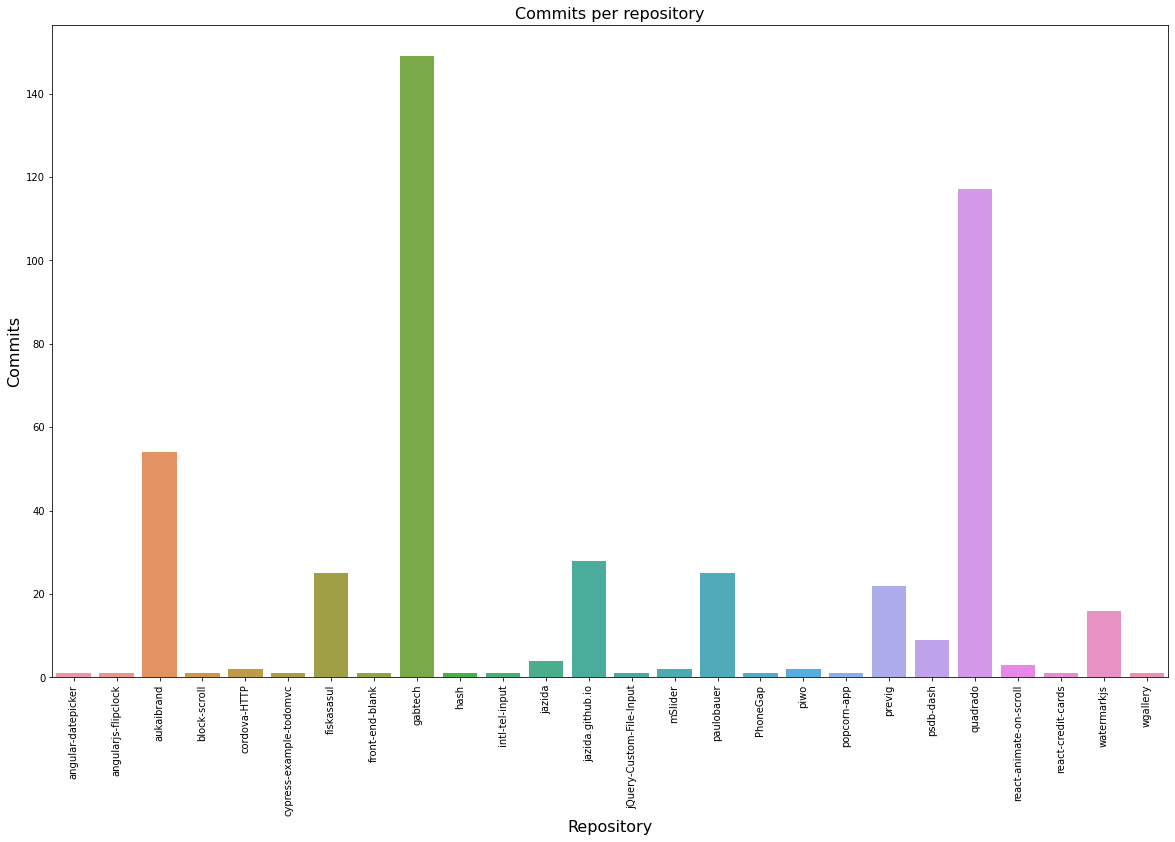

In [9]:
plt.figure(figsize = (20, 12))
sns.barplot(repos['Name'], repos['Commits count'])
plt.xticks(rotation = 90)
plt.xlabel("Repository", fontsize = 16)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits per repository", fontsize = 16)

In [10]:
commits['Year'] = commits['Date'].apply(lambda x: x.split('-')[0])
yearly_stats = commits.groupby('Year').count()['Commit Id']

/home/gsdenys/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Commits in each year')

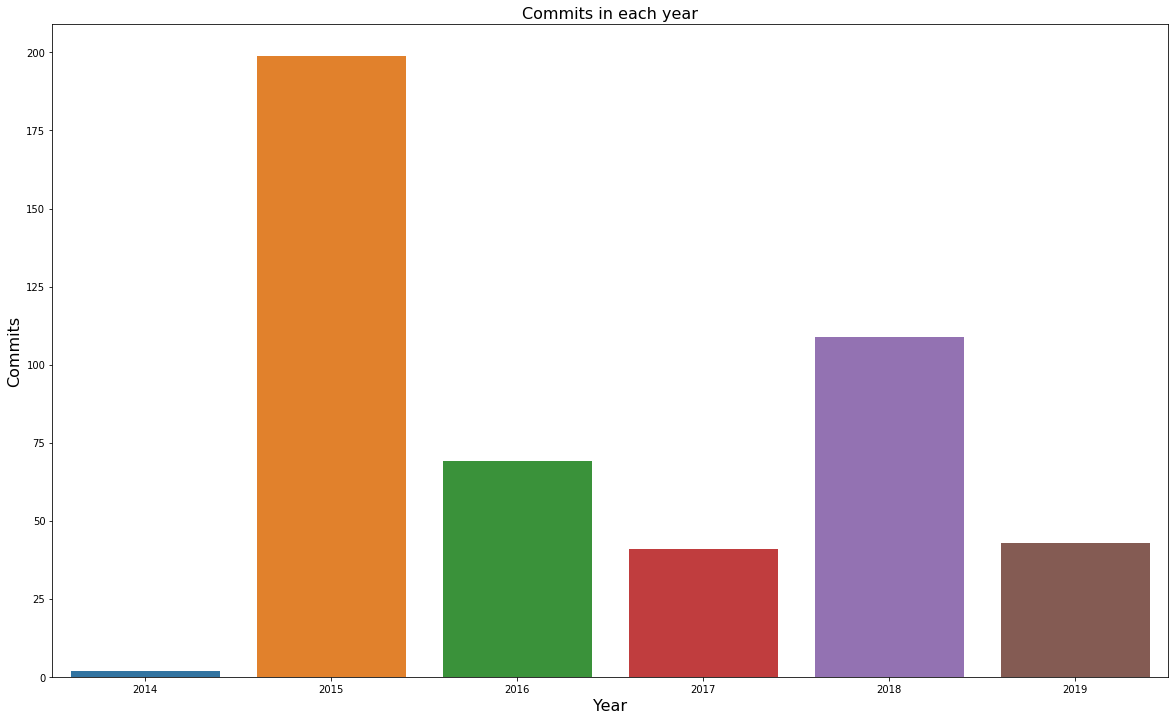

In [11]:
plt.figure(figsize = (20, 12))
sns.barplot(yearly_stats.index, yearly_stats.values)
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits in each year", fontsize = 16)

In [12]:
yearly_stats = yearly_stats.reset_index()
row_max = yearly_stats['Commit Id'].argmax()
year_max = yearly_stats['Year'][row_max]


commits['Month'] = commits['Date'].apply(lambda x: x.split('-')[1])
monthly_stats = commits[commits['Year'] == year_max].groupby('Month').count()['Commit Id']

/home/gsdenys/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Commits in each month of 2015')

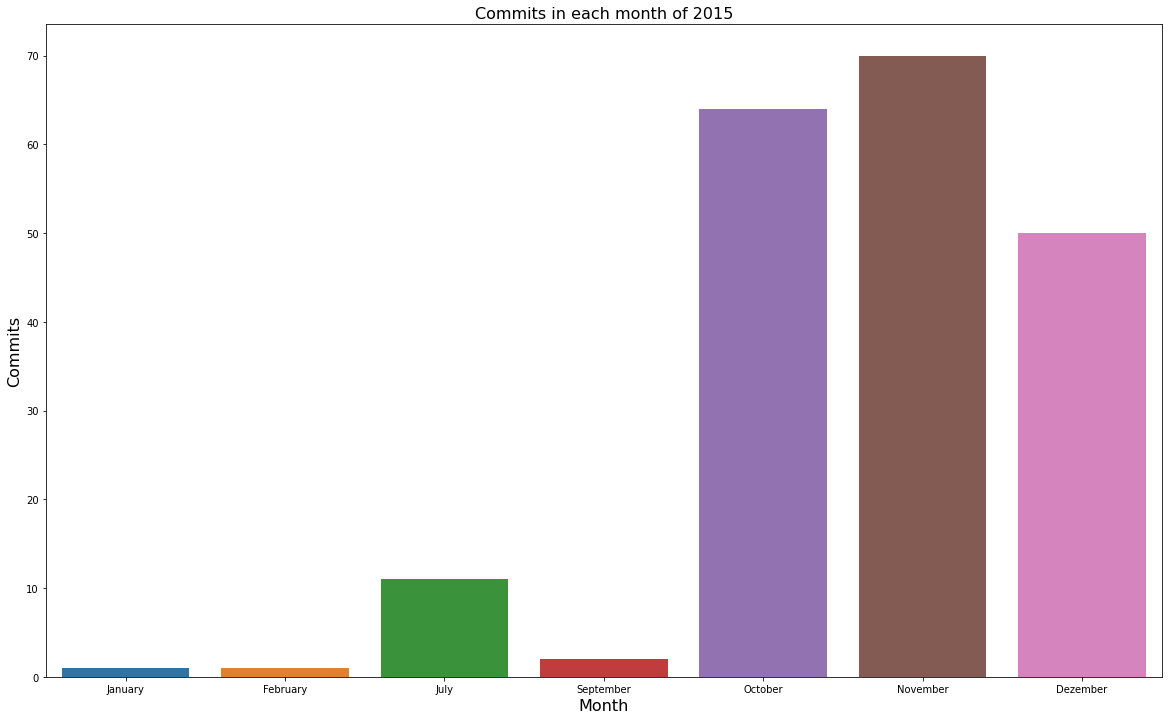

In [13]:
month_mapper = { '01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', '06': 'June', '07': 'July', '08': 'Autgust', '09': 'September','10': 'October', '11':'November', '12': 'Dezember'}
labels = []
for value in monthly_stats.index:
    labels.append(month_mapper[value])

plt.figure(figsize = (20, 12))
plot = sns.barplot(monthly_stats.index, monthly_stats.values)
plt.xlabel("Month", fontsize = 16)
plot.set_xticklabels(labels)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits in each month of "+year_max, fontsize = 16)

In [14]:
monthly_stats = monthly_stats.reset_index()
row_max = monthly_stats['Commit Id'].argmax()
month_max = monthly_stats['Month'][row_max]

commits['Date only'] = pd.to_datetime(commits['Date'].apply(lambda date: date.split('T')[0]))
commit_stats = commits[(commits['Year'] == year_max)
                       & (commits['Month'] == month_max)]['Date only'].value_counts().sort_index()

/home/gsdenys/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Commits in November, 2015')

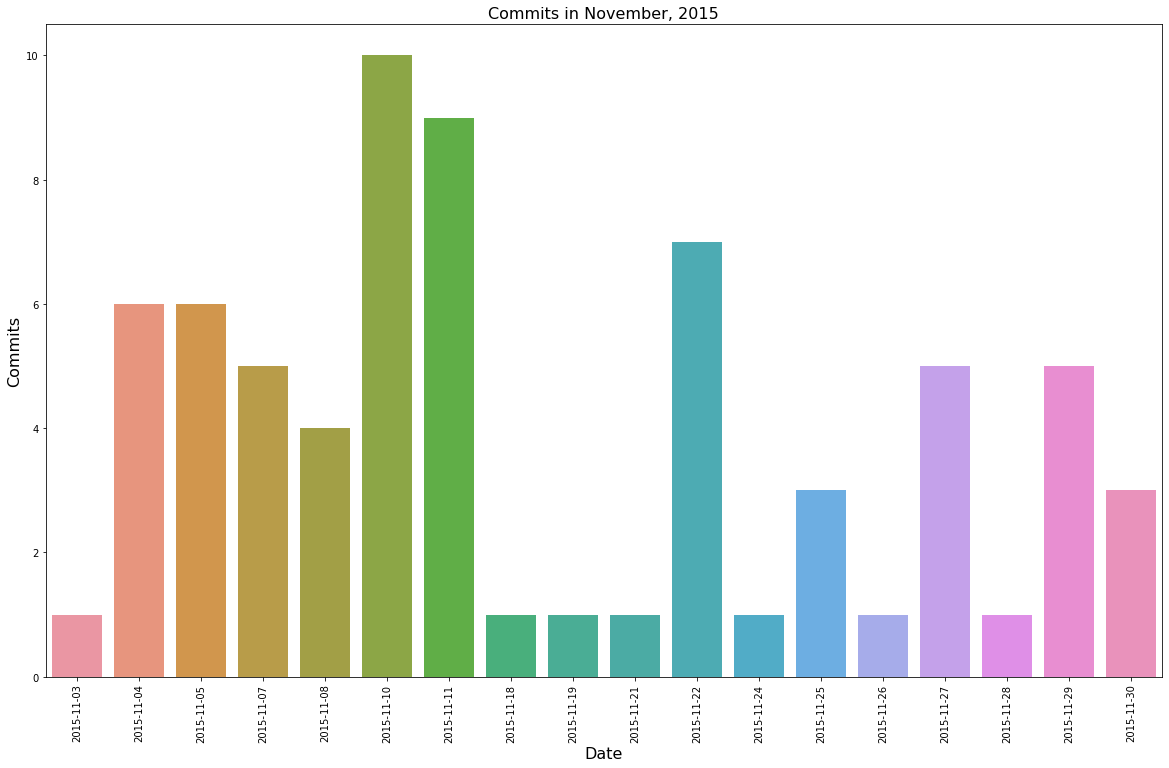

In [15]:
labels = []
for value in commit_stats.index:
    labels.append(value.date())
    
plt.figure(figsize = (20, 12))
plot = sns.barplot(commit_stats.index, commit_stats.values)
plt.xlabel("Date", fontsize = 16)
plt.xticks(rotation = 90)
plot.set_xticklabels(labels)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits in "+ month_mapper[month_max] +", " + year_max, fontsize = 16)

## Language

In [22]:
l = lang_df.groupby("Language").sum()
l.head()

,Repo Id,Size
Language,,
ApacheConf,39113571,886
Batchfile,68721027,17908
C,68721027,1025
CSS,1546767538,13887437
HTML,1517512640,3138182


/home/gsdenys/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Language'>

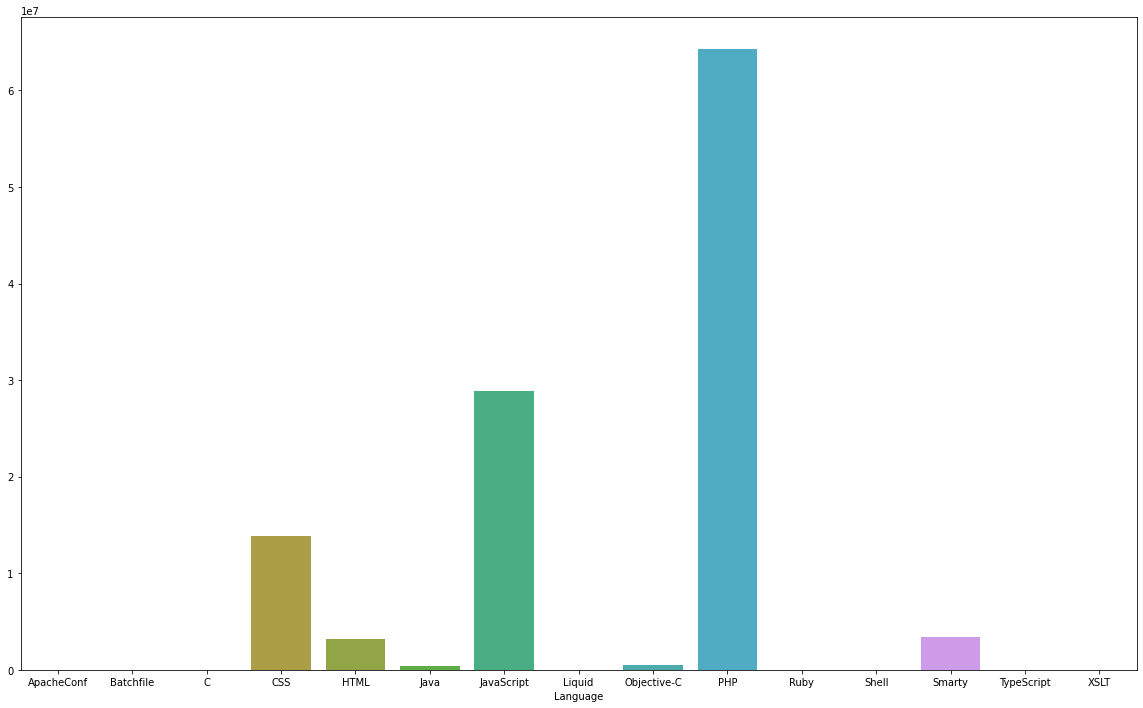

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns

plt.figure(figsize = (20, 12))
sns.barplot(l["Repo Id"].index, l["Size"].values)